In [11]:
import altair as alt
import numpy as np
import pandas as pd
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [12]:
df = pd.read_csv('sort.csv', sep=',', names=['algorithm', 'size', 'time'], skiprows=1)
df.head()

,algorithm,size,time
0,american_flag_sort_part,100,3
1,american_flag_sort_part,100,1
2,american_flag_sort_part,100,1
3,american_flag_sort_part,120,1
4,american_flag_sort_part,120,1


# Comparison of Sorting Algorithms by Running Time

## Entire Range (0 - 20 Mio)

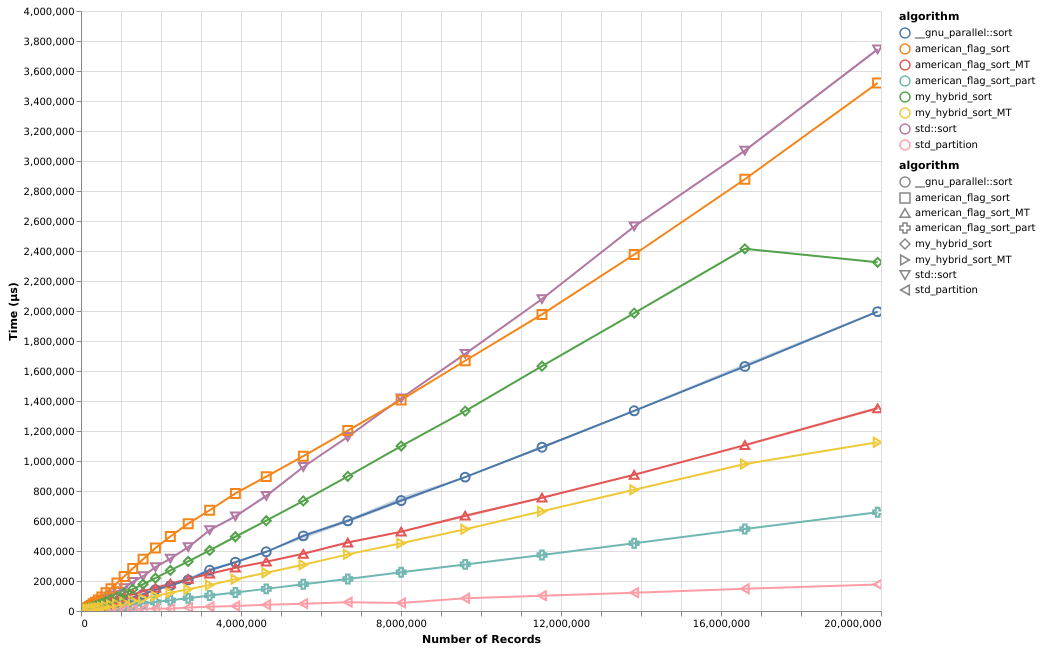

In [46]:
sc = alt.Scale()

base = alt.Chart(df, width=800, height=600).mark_line(strokeWidth=2, clip=True).encode(
    x=alt.X('size', title='Number of Records'),
    y=alt.Y('mean(time)', title='Time (µs)', scale=sc),
    color='algorithm'
)

points = base.mark_point(size=80, clip=True).encode(
    x='size',
    y=alt.Y('mean(time)', scale=sc),
    color='algorithm',
    shape='algorithm'
)

CI = base.mark_area(opacity=.3, clip=True).encode(
    x='size',
    y=alt.Y('ci0(time)', scale=sc),
    y2='ci1(time)'
)

base + points + CI

## Zoom-In on Range 7 Mio - 9 Mio

### American Flag Sort begins to perform better than std::sort

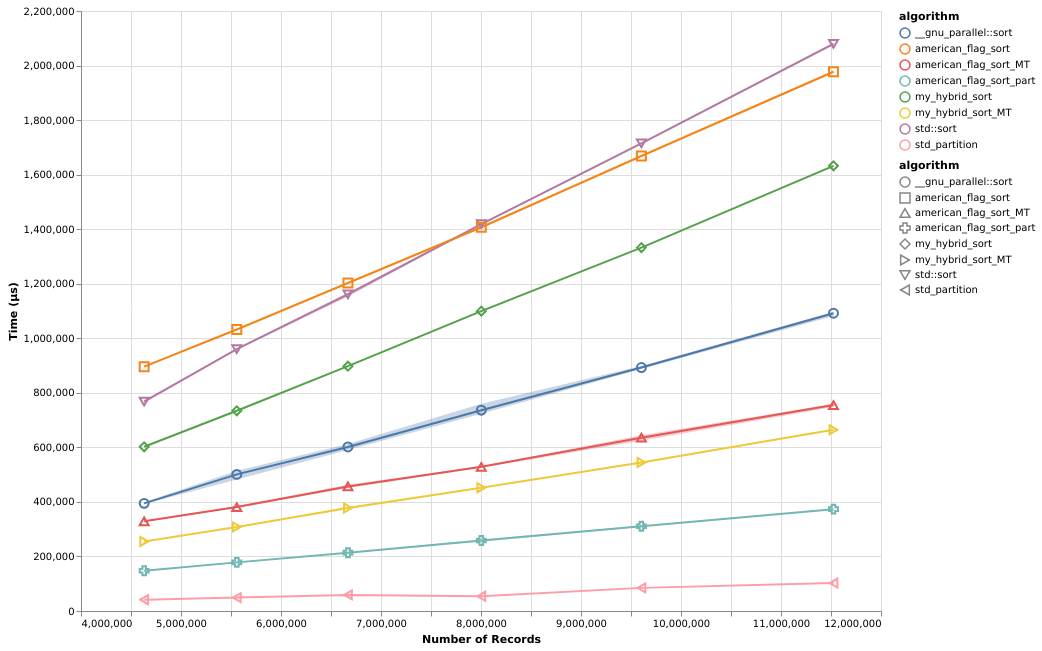

In [52]:
sc = alt.Scale()

base = alt.Chart(df[df['size'].between(4000000, 12000000)], width=800, height=600).mark_line(strokeWidth=2, clip=True).encode(
    x=alt.X('size', title='Number of Records'),
    y=alt.Y('mean(time)', title='Time (µs)', scale=sc),
    color='algorithm'
)

points = base.mark_point(size=80, clip=True).encode(
    x='size',
    y=alt.Y('mean(time)', scale=sc),
    color='algorithm',
    shape='algorithm'
)

CI = base.mark_area(opacity=.3, clip=True).encode(
    x='size',
    y=alt.Y('ci0(time)', scale=sc),
    y2='ci1(time)'
)

base + points + CI

## Zoom-In on Origin: Range 0 - 4 Mio

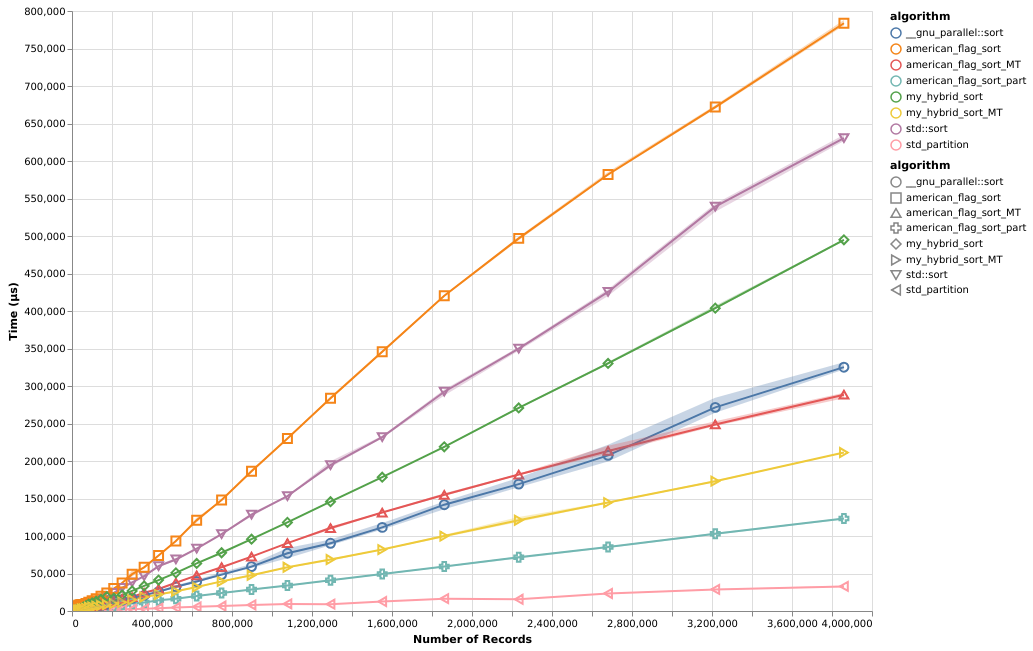

In [55]:
sc = alt.Scale()

base = alt.Chart(df[df['size'] < 4000000], width=800, height=600).mark_line(strokeWidth=2, clip=True).encode(
    x=alt.X('size', title='Number of Records'),
    y=alt.Y('mean(time)', title='Time (µs)', scale=sc),
    color='algorithm'
)

points = base.mark_point(size=80, clip=True).encode(
    x='size',
    y=alt.Y('mean(time)', scale=sc),
    color='algorithm',
    shape='algorithm'
)

CI = base.mark_area(opacity=.3, clip=True).encode(
    x='size',
    y=alt.Y('ci0(time)', scale=sc),
    y2='ci1(time)'
)

base + points + CI

## Zoom-In on Origin: Range 0 - 500,000

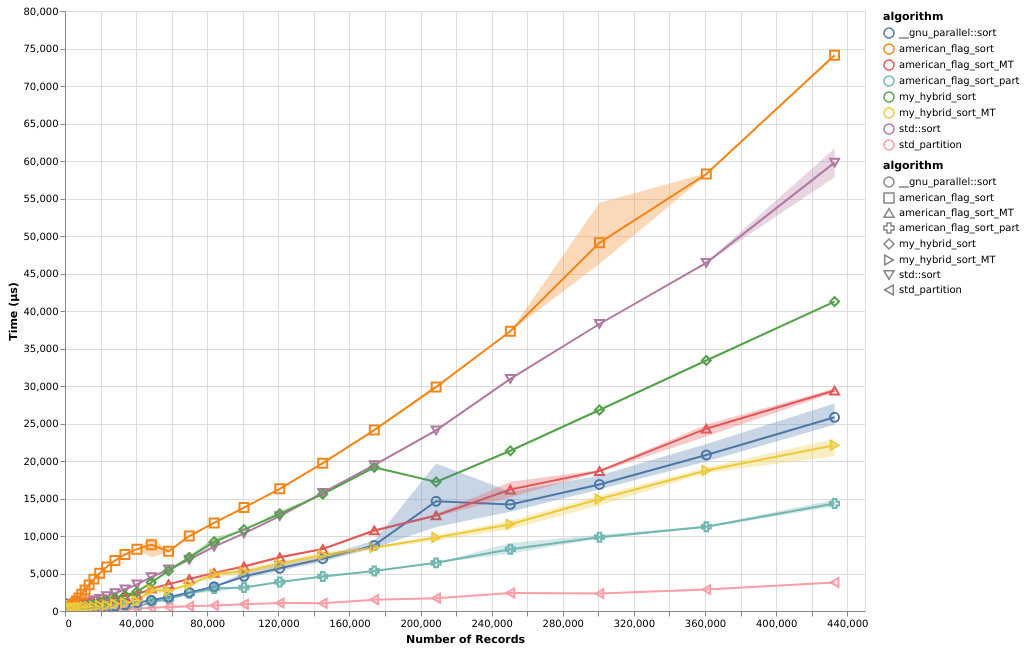

In [57]:
sc = alt.Scale()

base = alt.Chart(df[df['size'] < 500000], width=800, height=600).mark_line(strokeWidth=2, clip=True).encode(
    x=alt.X('size', title='Number of Records'),
    y=alt.Y('mean(time)', title='Time (µs)', scale=sc),
    color='algorithm'
)

points = base.mark_point(size=80, clip=True).encode(
    x='size',
    y=alt.Y('mean(time)', scale=sc),
    color='algorithm',
    shape='algorithm'
)

CI = base.mark_area(opacity=.3, clip=True).encode(
    x='size',
    y=alt.Y('ci0(time)', scale=sc),
    y2='ci1(time)'
)

base + points + CI

## Zoom-In on Origin: Range 0 - 70,000

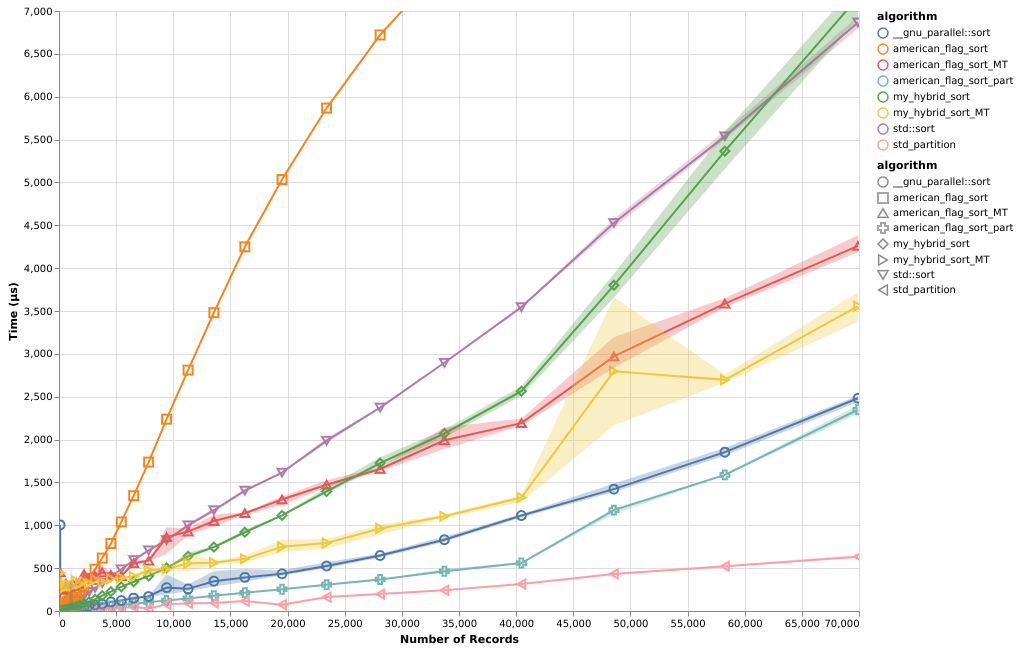

In [61]:
sc = alt.Scale(domain=[0, 7000])

base = alt.Chart(df[df['size'] < 70000], width=800, height=600).mark_line(strokeWidth=2, clip=True).encode(
    x=alt.X('size', title='Number of Records'),
    y=alt.Y('mean(time)', title='Time (µs)', scale=sc),
    color='algorithm'
)

points = base.mark_point(size=80, clip=True).encode(
    x='size',
    y=alt.Y('mean(time)', scale=sc),
    color='algorithm',
    shape='algorithm'
)

CI = base.mark_area(opacity=.3, clip=True).encode(
    x='size',
    y=alt.Y('ci0(time)', scale=sc),
    y2='ci1(time)'
)

base + points + CI

## Zoom-In on Origin: Range 0 - 10,000

- multi-threaded sorts have high fixed costs, but costs grow relatively slow
- MT hybrid sort outperforms std::sort at roughly 4k elements
- hybrid sort outperforms std::sort at roughly 9.5k elements

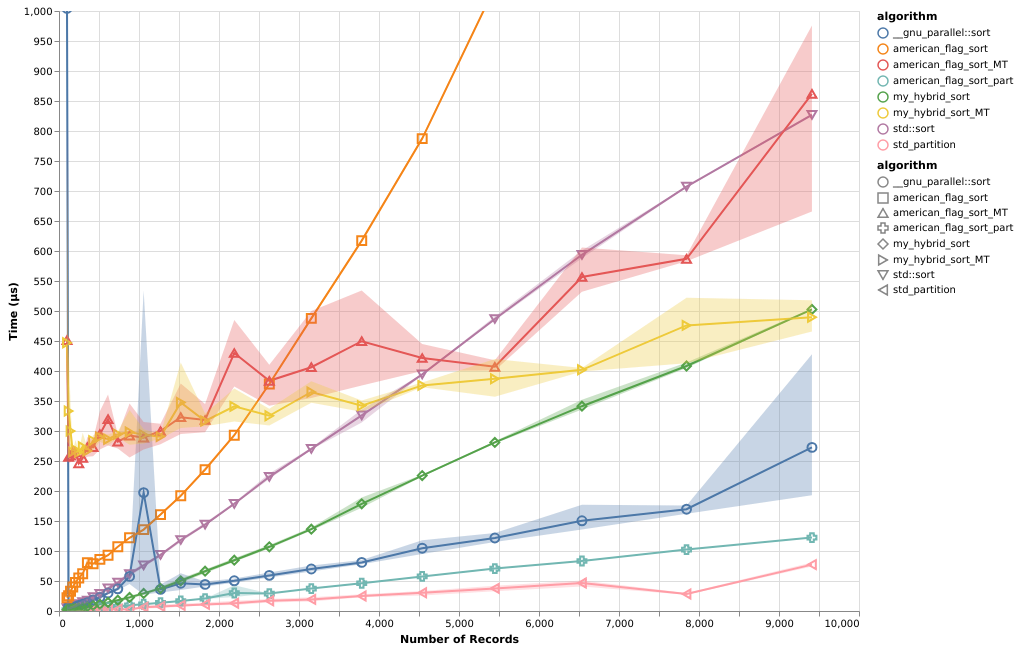

In [63]:
sc = alt.Scale(domain=[0, 1000])

base = alt.Chart(df[df['size'] < 10000], width=800, height=600).mark_line(strokeWidth=2, clip=True).encode(
    x=alt.X('size', title='Number of Records'),
    y=alt.Y('mean(time)', title='Time (µs)', scale=sc),
    color='algorithm'
)

points = base.mark_point(size=80, clip=True).encode(
    x='size',
    y=alt.Y('mean(time)', scale=sc),
    color='algorithm',
    shape='algorithm'
)

CI = base.mark_area(opacity=.3, clip=True).encode(
    x='size',
    y=alt.Y('ci0(time)', scale=sc),
    y2='ci1(time)'
)

base + points + CI

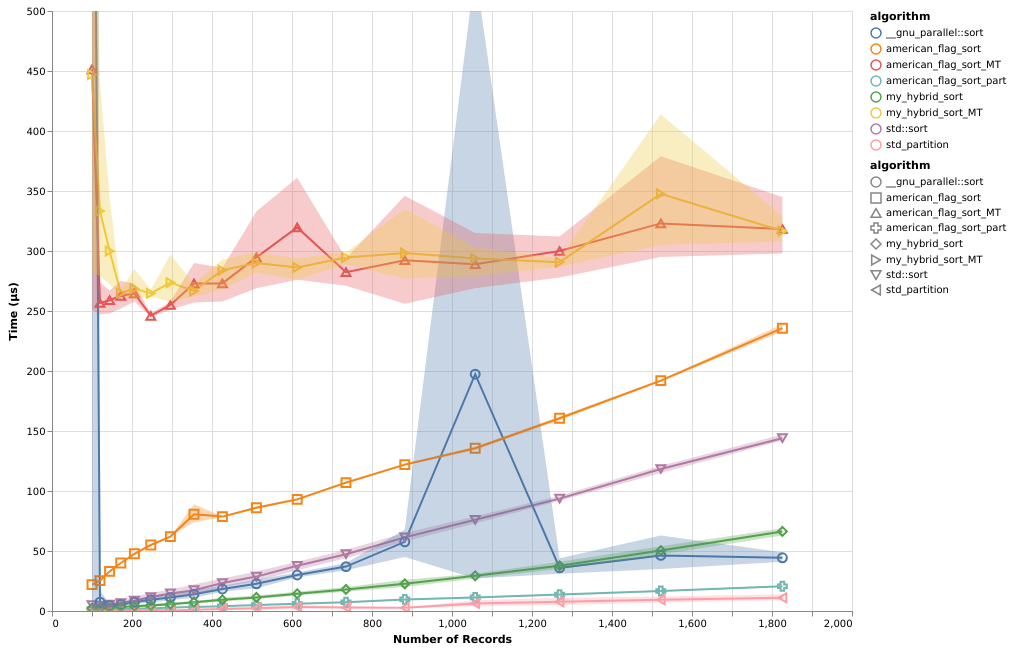

In [64]:
sc = alt.Scale(domain=[0, 500])

base = alt.Chart(df[df['size'] < 2000], width=800, height=600).mark_line(strokeWidth=2, clip=True).encode(
    x=alt.X('size', title='Number of Records'),
    y=alt.Y('mean(time)', title='Time (µs)', scale=sc),
    color='algorithm'
)

points = base.mark_point(size=80, clip=True).encode(
    x='size',
    y=alt.Y('mean(time)', scale=sc),
    color='algorithm',
    shape='algorithm'
)

CI = base.mark_area(opacity=.3, clip=True).encode(
    x='size',
    y=alt.Y('ci0(time)', scale=sc),
    y2='ci1(time)'
)

base + points + CI